# word vector 작성

- skipgram, window size 2

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

### Toy 말뭉치

In [2]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

### stopword 제거

In [3]:
stop_words = ['is', 'a', 'will', 'be']
results = []

for text in corpus:
    tmp = text.split(' ')
    for stop_word in stop_words:
        if stop_word in tmp:
            tmp.remove(stop_word)
    results.append(" ".join(tmp))

In [4]:
corpus = results
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

### vocaburary 모음 작성

In [5]:
words = []

for sentence in corpus:
    for word in sentence.split(' '):
        words.append(word)

words = set(words)
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

### word-to-index, index-to-word 작성

- word 를 index 로 변환  

- sentence 를 word index 로 변환  

- window size 에 따라 train data 생성

In [6]:
word2index = dict((w, i) for i, w in enumerate(words))
index2word = dict((i, w) for i, w in enumerate(words))

In [7]:
word2index

{'strong': 0,
 'boy': 1,
 'girl': 2,
 'wise': 3,
 'woman': 4,
 'pretty': 5,
 'young': 6,
 'princess': 7,
 'king': 8,
 'queen': 9,
 'prince': 10,
 'man': 11}

### skip-gram 으로 training data 생성

In [8]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [9]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [10]:
data[:10]

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman']]

In [11]:
import pandas as pd

df = pd.DataFrame(data, columns = ['input', 'label'])
df.head()

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king


### One hot encoding

In [12]:
len(words)

12

In [13]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(index):
    one_hot_encoding = np.zeros(12)
    one_hot_encoding[index] = 1
    return one_hot_encoding

### One hot encoding 된 train, label data

In [14]:
X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2index[x]))
    Y.append(to_one_hot_encoding(word2index[y] ))

In [15]:
print(X[:2])
print(Y[:2])

[array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])]
[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])]


In [16]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [17]:
model = Sequential()
model.add(Dense(2, input_dim=12))
model.add(Dense(12))

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.fit(X_train, Y_train, epochs=2000, batch_size=3)

### 첫번째 Hidden Layer 추출 및 weight + bias 를 vector 로 합산

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 26        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                36        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]

array([[-0.43790844, -0.7591848 ],
       [-0.33692855, -1.3311243 ],
       [-0.8356769 , -1.2560662 ],
       [-0.42919368, -0.5753336 ],
       [-0.4120379 , -1.3691221 ],
       [-0.33678672, -1.2683877 ],
       [-0.8946817 , -0.80940074],
       [-0.23462221, -0.54987293],
       [ 0.03985801, -1.507281  ],
       [-0.4373396 , -0.59136516],
       [ 0.41488144, -1.6005121 ],
       [-0.01121777, -1.4297224 ]], dtype=float32)

In [20]:
vectors= model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]
vectors[:5]

array([[-0.43790844, -0.7591848 ],
       [-0.33692855, -1.3311243 ],
       [-0.8356769 , -1.2560662 ],
       [-0.42919368, -0.5753336 ],
       [-0.4120379 , -1.3691221 ]], dtype=float32)

In [37]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]

In [38]:
w2v_df

,word,x1,x2
0,strong,-0.437908,-0.759185
1,boy,-0.336929,-1.331124
2,girl,-0.835677,-1.256066
3,wise,-0.429194,-0.575334
4,woman,-0.412038,-1.369122
5,pretty,-0.336787,-1.268388
6,young,-0.894682,-0.809401
7,princess,-0.234622,-0.549873
8,king,0.039858,-1.507281
9,queen,-0.437340,-0.591365


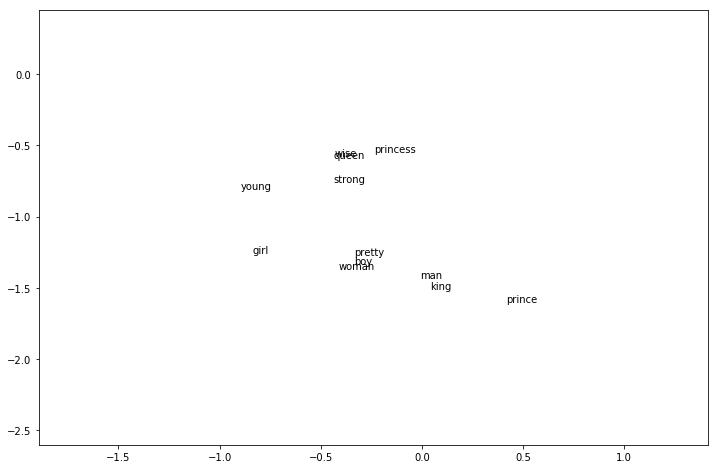

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [46]:
w2v_df.set_index('word', inplace=True)

In [47]:
w2v_df.loc['king',:] - w2v_df.loc['prince',:]

x1   -0.375023
x2    0.093231
dtype: float32

In [48]:
w2v_df.loc['queen'] - w2v_df.loc['princess']

x1   -0.202717
x2   -0.041492
dtype: float32